# US Presidential Election Prediction based on Census Data
### *Mangalam Sontakke*

### The project predicts the results of the 2020 US Presidential Election using data from the US Census and prior election years, specifically 2008, 2012 and 2016.

### The following algorithms have been used, and their performance has been compared:-
#### 1. KNN
#### 2. Decision Trees
#### 3. Random Forest

##### *NOTE: This project is solely for academic and research purposes, and serves no political purposes.*

## Stage 1: Data Processing

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [360]:
df = pd.read_csv('county_census_and_election_result.csv')
df

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7521,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
7522,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
7523,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
7524,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


In [361]:
#Dimensions of the dataset
df.shape

(7526, 45)

In [362]:
#Data types
df.dtypes

year                      int64
county_fips               int64
inctot                  float64
mortamt1                float64
avrg_age                float64
ftotinc                 float64
foodstmp_1_freq         float64
foodstmp_2_freq         float64
sex_2_freq              float64
sex_1_freq              float64
marst_5_freq            float64
marst_6_freq            float64
marst_1_freq            float64
marst_4_freq            float64
marst_3_freq            float64
marst_2_freq            float64
race_1_freq             float64
race_2_freq             float64
race_7_freq             float64
race_8_freq             float64
race_5_freq             float64
race_6_freq             float64
race_3_freq             float64
race_4_freq             float64
race_9_freq             float64
ctz_stat_1_freq         float64
ctz_stat_3_freq         float64
ctz_stat_2_freq         float64
lang_1_freq             float64
lang_2_freq             float64
educ_attain_2.0_freq    float64
educ_att

In [363]:
#5 number summary of numerical attributes
df.describe()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,democrat,green,liberitarian,other,republican,winner
count,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,...,7526.000000,7526.000000,7526.000000,7526.000000,1.670000e+03,1670.000000,1670.000000,1670.000000,1.670000e+03,1670.000000
mean,2012.369253,27810.761228,28325.447077,884.343848,46.748220,57025.384999,90.560404,9.439596,51.956683,48.043317,...,1.261175,58.670648,37.460218,3.869280,1.158984e+05,167.460479,668.785629,4803.562275,8.568574e+04,0.488623
std,4.916645,16197.855610,6973.567827,284.898492,2.641396,13720.562319,4.974988,4.974988,1.708150,1.708106,...,0.919959,6.223587,5.988654,1.557713,1.918876e+05,805.370013,2083.527700,10236.284021,9.659596e+04,0.500020
min,2000.000000,1.000000,14165.200000,397.100000,36.100000,31193.400000,58.000000,0.400000,33.400000,38.400000,...,0.000000,30.700000,20.300000,0.300000,2.474000e+03,0.000000,0.000000,0.000000,2.187000e+03,0.000000
25%,2008.000000,13021.000000,23549.800000,680.125000,45.200000,47305.025000,87.700000,5.800000,51.100000,47.000000,...,0.700000,54.900000,33.400000,2.700000,2.843275e+04,0.000000,0.000000,756.250000,3.562700e+04,0.000000
50%,2013.000000,28000.000000,26843.600000,808.200000,46.700000,53615.350000,91.200000,8.800000,52.100000,47.900000,...,1.000000,59.200000,36.800000,3.600000,5.305350e+04,0.000000,0.000000,1856.000000,5.448950e+04,0.000000
75%,2017.000000,42000.000000,31579.250000,1019.500000,48.200000,63757.000000,94.200000,12.300000,53.000000,48.900000,...,1.500000,63.000000,41.000000,4.700000,1.281622e+05,0.000000,0.000000,4808.250000,1.002938e+05,1.000000
max,2020.000000,56000.000000,68229.100000,2080.900000,59.600000,137573.700000,99.600000,42.000000,61.600000,66.600000,...,7.900000,78.300000,67.200000,12.400000,3.028885e+06,21660.000000,35452.000000,200201.000000,1.145530e+06,1.000000


In [364]:
# Visualizing 
# sns.histplot(df)

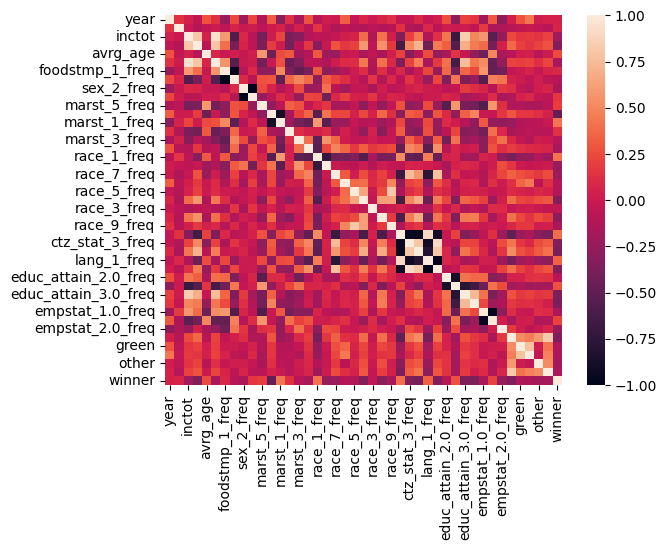

In [365]:
# Plotting a heatmap to view the distribution of features
corr=df.corr(numeric_only = True)
# plt.figure(figsize=(12,8))
sns.heatmap(data=corr)
plt.show()

### We will train our models on election data from the years 2008, 2012 and 2016, and use that to predict election results for 2020. Hence we consider the data for only those years.

In [366]:
# selecting the rows that have the voting labels (years 2008, 2012, 2016, 2020)
new_df = df.loc[df['year'].isin([2008, 2012, 2016, 2020])]
new_df = new_df.reset_index(drop=True)
new_df

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,41.6,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,43.5,2.4,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0
2,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,41.1,4.5,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0
3,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,46.8,2.9,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0
4,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,38.1,3.4,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
1854,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
1855,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
1856,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


#### **Feature Selection**:-
#### We now drop the categorical state names and abbreviation as they are irrelevant to our prediction model. We will also drop the all the vote count labels except for "winner" columns (0 for Democrats and 1 for Republican) as well as those corresponding to third parties which garner a very low vote share compared to the major 2 parties.

#### Dropping the following columns:-

##### 1. county_fips: county FIP code
##### 2. state_po: state appreviations
##### 3. county_name: county names
##### 4. democrat: Democratic candidate's votecount
##### 5. green: Green  candidate's votecount
##### 6. liberitarian: Liberitarian candidate's votecount
##### 7. other: Other  candidates' votecount
##### 8. republican: Republican candidate's votecount

#### All the above columns have no correlation with the task of predicting the final election winner.

In [367]:
# Feature selection
modified_df = new_df.drop(columns=['county_fips', 'state_po', 'county_name', 'democrat', 'green', 'liberitarian', 'other', 'republican'])
modified_df

,year,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,marst_5_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,winner
0,2008,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,NaN
1,2008,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1.0
2,2008,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,1.0
3,2008,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,1.0
4,2008,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2020,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,7.3,...,94.4,5.6,50.9,40.7,7.8,0.6,56.3,42.3,1.4,1.0
1854,2020,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,5.9,...,91.4,8.6,56.1,33.2,9.1,1.7,61.6,37.6,0.8,1.0
1855,2020,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,7.4,...,93.1,6.9,59.8,26.5,12.9,0.8,60.7,37.3,2.0,1.0
1856,2020,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,6.7,...,96.1,3.9,51.1,41.3,7.2,0.4,56.9,41.5,1.6,1.0


In [368]:
# Filling missing values using backward and forward filling methods
modified_df = modified_df.fillna(method='ffill')
modified_df = modified_df.fillna(method='bfill')

#Checking no of missing values
modified_df.isna().sum()

year                    0
inctot                  0
mortamt1                0
avrg_age                0
ftotinc                 0
foodstmp_1_freq         0
foodstmp_2_freq         0
sex_2_freq              0
sex_1_freq              0
marst_5_freq            0
marst_6_freq            0
marst_1_freq            0
marst_4_freq            0
marst_3_freq            0
marst_2_freq            0
race_1_freq             0
race_2_freq             0
race_7_freq             0
race_8_freq             0
race_5_freq             0
race_6_freq             0
race_3_freq             0
race_4_freq             0
race_9_freq             0
ctz_stat_1_freq         0
ctz_stat_3_freq         0
ctz_stat_2_freq         0
lang_1_freq             0
lang_2_freq             0
educ_attain_2.0_freq    0
educ_attain_1.0_freq    0
educ_attain_3.0_freq    0
educ_attain_4.0_freq    0
empstat_1.0_freq        0
empstat_3.0_freq        0
empstat_2.0_freq        0
winner                  0
dtype: int64

### Now we divide the dataset, and use the 2008, 2012 and 2016 data to train the models, while the 2020 data, which we want to predict, serves as testing set.

In [369]:
# selecting 2008, 2012 and 2016 rows
df1 = modified_df.loc[modified_df['year'].isin([2008, 2012, 2016])]

# Having extracted this data, the year is no longer useful to us. Hence dropping that label.
df1 = df1.drop(columns=['year'])
df1 = df1.reset_index(drop=True)
df1

,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,marst_5_freq,marst_6_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,winner
0,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,17.4,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,1.0
1,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,12.1,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1.0
2,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,19.5,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,1.0
3,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,13.8,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,1.0
4,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,23.5,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,27538.2,677.6,49.2,51816.9,94.5,5.5,48.2,51.8,6.1,21.3,...,96.7,3.3,49.9,42.8,6.4,0.9,62.1,37.0,0.9,1.0
1376,28492.6,791.8,47.6,54223.3,93.4,6.6,49.0,51.0,6.0,24.3,...,93.2,6.8,51.5,39.3,8.1,1.2,59.8,38.1,2.1,1.0
1377,38620.6,917.7,50.4,79339.5,97.0,3.0,51.7,48.3,5.7,19.4,...,94.0,6.0,57.5,29.2,11.8,1.5,64.2,33.5,2.3,1.0
1378,25730.9,656.8,47.0,57601.9,92.2,7.8,47.7,52.3,4.3,29.3,...,94.7,5.3,49.0,44.4,6.1,0.5,59.4,38.8,1.8,1.0


In [370]:
# Splitting the data into input features and output label ('winner')

X_df1 = df1.iloc[:,:-1]
y_df1 = df1.iloc[:,-1]
y_df1 = y_df1.values.reshape(-1, 1)

In [371]:
# Data Normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_df1 = X_scaler.fit_transform(X_df1)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_df1 = y_scaler.fit_transform(y_df1)

In [372]:
# Splitting into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.25, random_state=0)

In [373]:
### Performing similar preprocessing on 2020 data

df2 = modified_df.loc[modified_df['year'].isin([2020])]

# Dropping the year label
df2 = df2.drop(columns=['year'])
df2 = df2.reset_index(drop=True)
df2

,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,marst_5_freq,marst_6_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,winner
0,22991.6,612.5,48.9,49458.4,87.9,12.1,51.7,48.3,8.8,23.4,...,95.7,4.3,45.7,45.8,7.6,0.9,48.7,48.8,2.5,1.0
1,30231.5,768.1,51.8,65765.1,93.7,6.3,51.6,48.4,9.5,15.9,...,97.0,3.0,49.9,37.9,10.6,1.6,47.5,51.1,1.4,1.0
2,19634.8,484.2,45.3,43477.4,84.2,15.8,56.0,44.0,8.8,27.8,...,96.5,3.5,41.7,49.6,7.9,0.8,46.9,47.6,5.5,1.0
3,19265.8,505.4,49.6,40778.3,85.0,15.0,53.0,47.0,12.0,18.8,...,95.2,4.8,44.7,48.7,6.2,0.5,48.8,49.0,2.2,1.0
4,28664.8,786.3,47.6,62251.4,86.6,13.4,54.2,45.8,8.1,29.4,...,95.9,4.1,50.3,36.6,11.4,1.6,52.5,43.9,3.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,7.3,24.2,...,94.4,5.6,50.9,40.7,7.8,0.6,56.3,42.3,1.4,1.0
474,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,5.9,26.8,...,91.4,8.6,56.1,33.2,9.1,1.7,61.6,37.6,0.8,1.0
475,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,7.4,20.0,...,93.1,6.9,59.8,26.5,12.9,0.8,60.7,37.3,2.0,1.0
476,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,6.7,28.2,...,96.1,3.9,51.1,41.3,7.2,0.4,56.9,41.5,1.6,1.0


In [374]:
# Splitting the data into input features and output label ('winner')

X_df2 = df2.iloc[:,:-1]
y_df2 = df2.iloc[:,-1]
y_df2 = y_df2.values.reshape(-1, 1)

In [375]:
# Data Normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_df2 = X_scaler.fit_transform(X_df2)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_df2 = y_scaler.fit_transform(y_df2)

## Stage 2: Machine Learning Modelling

## Algorithm 1: *k-Nearest Neighbours*

In [376]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

# Training the model
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [377]:
#Predicting on 2008, 2012 and 2016 data itself
y_test_pred = KNN.predict(X_test)
y_train_pred = KNN.predict(X_train)
y_train_pred

array([ 1., -1.,  1., ...,  1.,  1., -1.])

In [378]:
# Evaluating model performance on 2008, 2012 and 2016 data

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Training MSE = 0.448309
Validating MSE = 0.776812
Accuracy = 0.805797
F1 Score = 0.798799
Precision Score = 0.786982
Recall Score = 0.810976
ROC-AUC Score = 0.806040


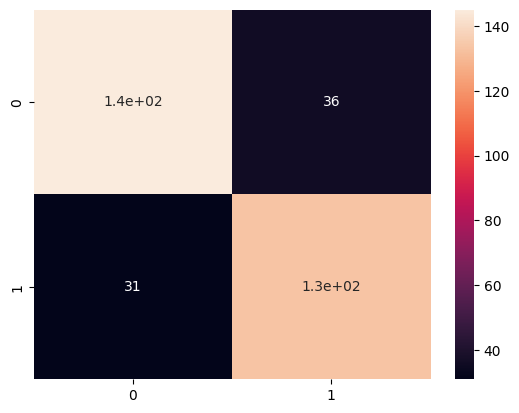

In [379]:
# Plotting a confusion matrix for model performance
cm = metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [380]:
# Classification report
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        -1.0       0.82      0.80      0.81       181
         1.0       0.79      0.81      0.80       164

    accuracy                           0.81       345
   macro avg       0.81      0.81      0.81       345
weighted avg       0.81      0.81      0.81       345



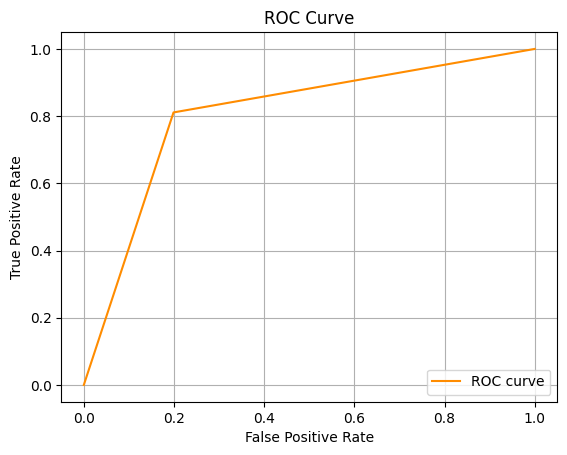

In [381]:
# Plotting an ROC curve

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [382]:
# ROC-AUC Score
score = metrics.roc_auc_score(y_test, y_test_pred)
print('ROC-AUC Score is ', score)

ROC-AUC Score is  0.8060402910658943


In [383]:
# Testing the kNN Classification model using different values of k (3,4,5,6,7,8,9), and tabulating the results using the Tabulate package

from tabulate import tabulate

neighbours = [3, 4, 5, 6, 7, 8, 9]
train_size = [0.75, 0.70, 0.80]
accuracy = {}
precision = {}
f1 = {}
recall = {}

def scale(df):
    scaler = preprocessing.MinMaxScaler()
    for col in df1.columns:
        df1[col]=scaler.fit_transform(df1[col].values.reshape(-1,1))
    return df1



def knn(neighbours, train_size, X_df1, y_df1):
    results = []

    for k in neighbours:
        for i in train_size:
            x_train1, x_test1, y_train1, y_test1 = train_test_split(X_df1, y_df1, train_size=i, random_state=5)
            # x_train1 = scale(x_train1)
            # x_test1 = scale(x_test1)
            KNN = KNeighborsClassifier(n_neighbors=k)
            KNN.fit(x_train1, y_train1)
            y_pred1 = KNN.predict(x_test1)
            accuracy[k] = metrics.accuracy_score(y_test1, y_pred1)
            precision[k] = metrics.precision_score(y_test1, y_pred1)
            f1[k] = metrics.f1_score(y_test1, y_pred1)
            recall[k] = metrics.recall_score(y_test1, y_pred1)
            results.append([k, i, accuracy[k], precision[k], f1[k], recall[k]])

    headers = ["K", "Train Size", "Accuracy", "Precision", "F1 Score", "Recall"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

knn(neighbours, train_size, X_df1, y_df1)

+-----+--------------+------------+-------------+------------+----------+
|   K |   Train Size |   Accuracy |   Precision |   F1 Score |   Recall |
+=====+==============+============+=============+============+==========+
|   3 |         0.75 |   0.73913  |    0.730337 |   0.742857 | 0.755814 |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.7  |   0.744578 |    0.757282 |   0.746411 | 0.735849 |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.8  |   0.764493 |    0.748299 |   0.77193  | 0.797101 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.75 |   0.742029 |    0.807407 |   0.710098 | 0.633721 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.7  |   0.739759 |    0.837662 |   0.704918 | 0.608491 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.8  |   0.753623 |   

### Hence we see the model performs comparatively better for higher values of k.

## Algorithm 2: *Decision Tree*

In [384]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [385]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=1234,max_depth=5)

# Training the model
clf.fit(X_df1, y_df1)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1234)

In [386]:
#Predicting on 2008, 2012 and 2016 data itself
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
y_train_pred

array([ 1., -1.,  1., ...,  1.,  1., -1.])

In [387]:
# Evaluating model performance on 2008, 2012 and 2016 data

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Training MSE = 0.807729
Validating MSE = 0.823188
Accuracy = 0.794203
F1 Score = 0.810667
Precision Score = 0.720379
Recall Score = 0.926829
ROC-AUC Score = 0.800431


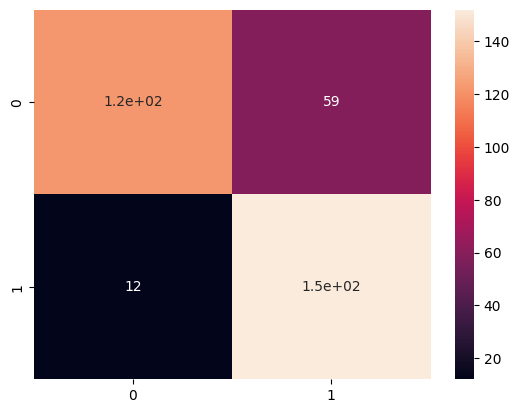

In [388]:
# Plotting a confusion matrix for model performance
cm = metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [389]:
# Classification report
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        -1.0       0.91      0.67      0.77       181
         1.0       0.72      0.93      0.81       164

    accuracy                           0.79       345
   macro avg       0.82      0.80      0.79       345
weighted avg       0.82      0.79      0.79       345



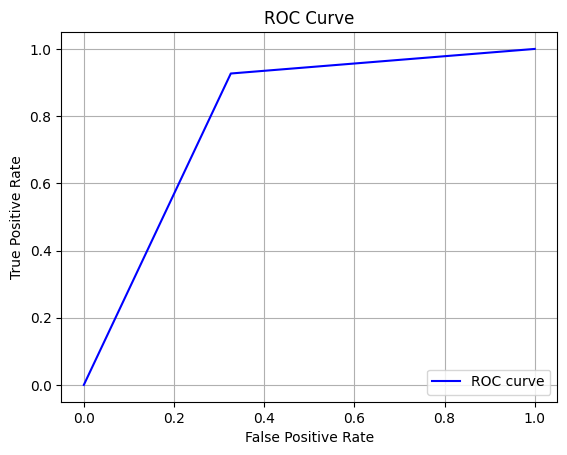

In [390]:
# Plotting an ROC curve

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [391]:
# ROC-AUC Score
score = metrics.roc_auc_score(y_test, y_test_pred)
print('ROC-AUC Score is ', score)

ROC-AUC Score is  0.8004312087319769


In [392]:
# Viewing tree structure
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_9 <= -0.47
|   |--- feature_25 <= -0.57
|   |   |--- feature_2 <= 0.21
|   |   |   |--- feature_26 <= 0.69
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_26 >  0.69
|   |   |   |   |--- feature_9 <= -0.69
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_9 >  -0.69
|   |   |   |   |   |--- class: 1.0
|   |   |--- feature_2 >  0.21
|   |   |   |--- feature_11 <= 0.53
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_11 >  0.53
|   |   |   |   |--- class: -1.0
|   |--- feature_25 >  -0.57
|   |   |--- feature_9 <= -0.71
|   |   |   |--- class: 1.0
|   |   |--- feature_9 >  -0.71
|   |   |   |--- feature_1 <= -0.21
|   |   |   |   |--- feature_20 <= -0.98
|   |   |   |   |   |--- class: -1.0
|   |   |   |   |--- feature_20 >  -0.98
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  -0.21
|   |   |   |   |--- feature_13 <= -0.76
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_13 >  -0.76
|   |   |   |   |   |--- c

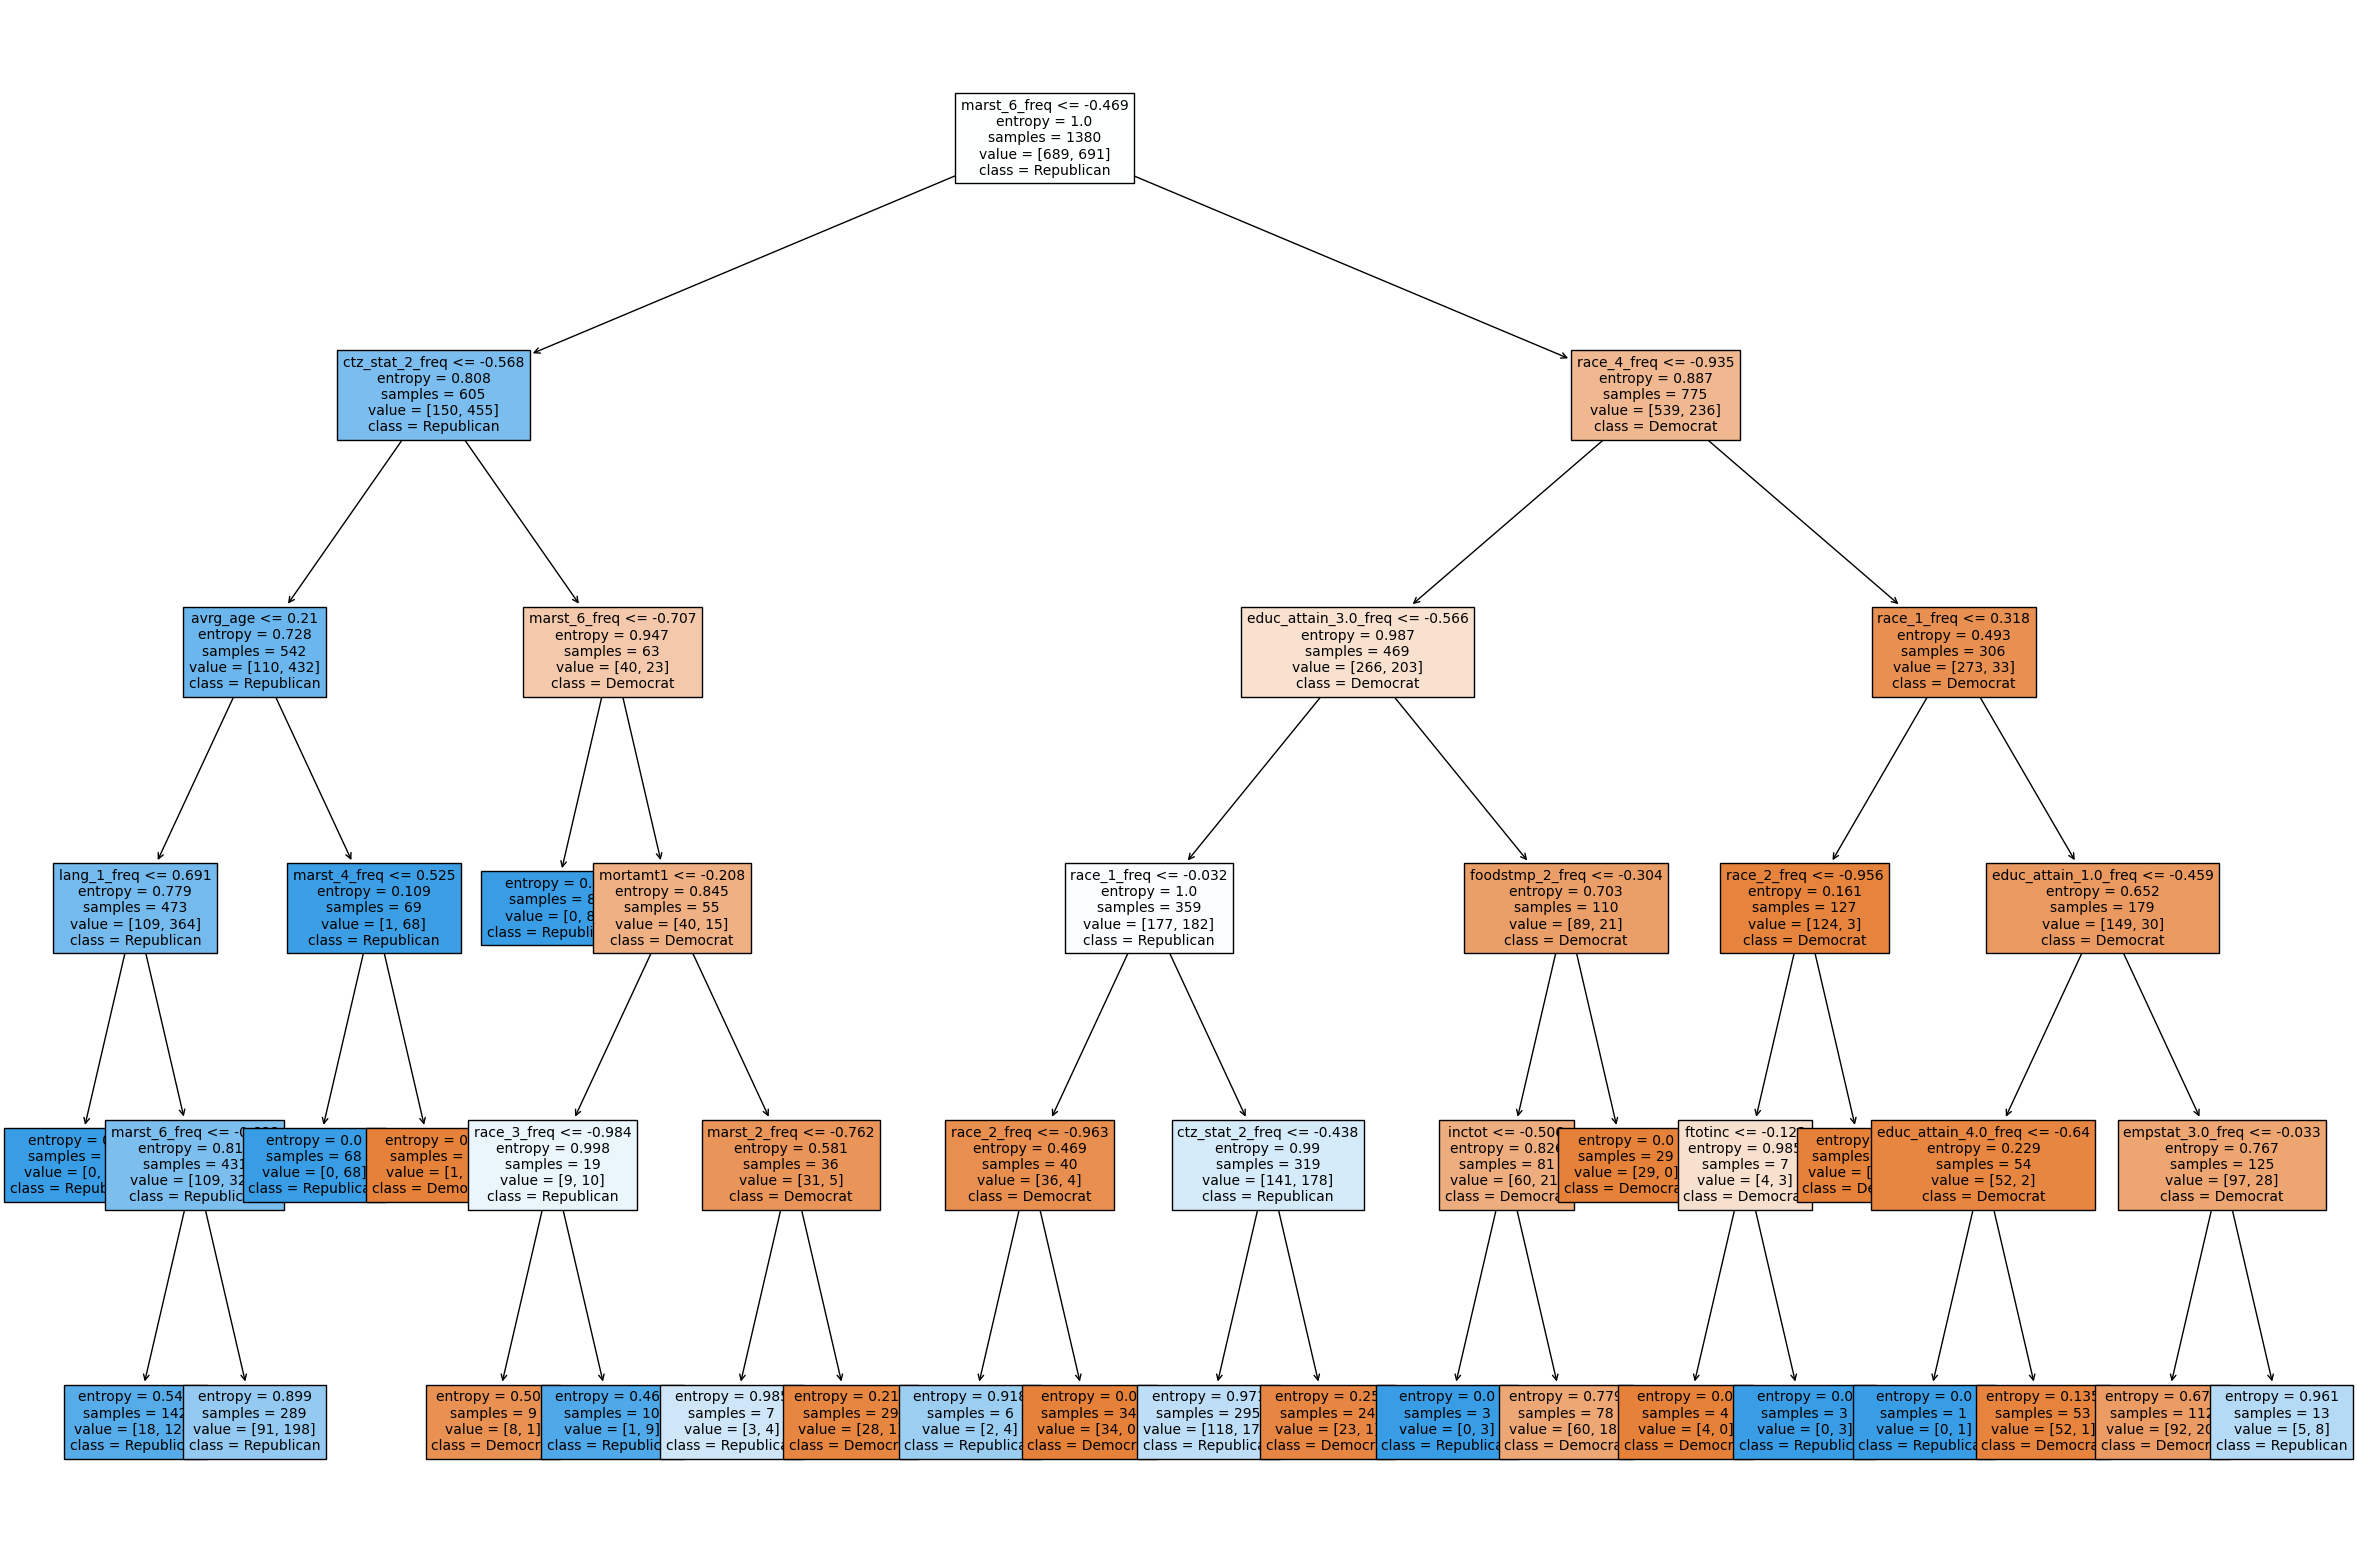

In [393]:
# Plotting the tree using plot_tree

# class_names=y.unique()
# class_names = class_names.tolist()

fig = plt.figure(figsize=(30,20))
treee = tree.plot_tree(clf, feature_names=df1.columns.tolist(),  class_names=['Democrat','Republican'], filled=True, fontsize=10)

### This gives a visual representation of the features that affect whether a Democrat or a Republican wins the election

## Algorithm 3: *Random Forest*

In [394]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [395]:
ranfor = RandomForestClassifier(n_estimators= 10, criterion="entropy")  

# Training the model
ranfor.fit(X_df1, y_df1)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [396]:
#Predicting on 2008, 2012 and 2016 data itself
y_test_pred = ranfor.predict(X_test)
y_train_pred = ranfor.predict(X_train)
y_train_pred

array([ 1., -1.,  1., ...,  1.,  1., -1.])

In [397]:
# Evaluating model performance on 2008, 2012 and 2016 data

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Training MSE = 0.030918
Validating MSE = 0.046377
Accuracy = 0.988406
F1 Score = 0.987730
Precision Score = 0.993827
Recall Score = 0.981707
ROC-AUC Score = 0.988091


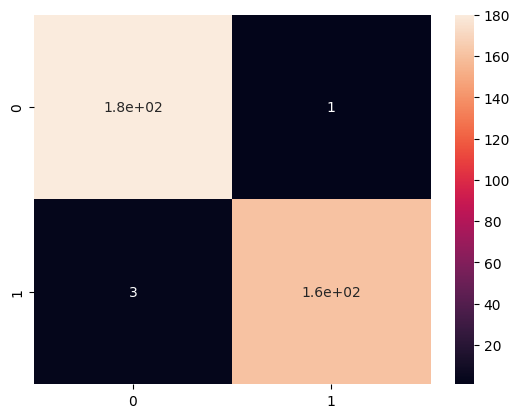

In [398]:
# Plotting a confusion matrix for model performance
cm = metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [399]:
# Classification report
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.99       181
         1.0       0.99      0.98      0.99       164

    accuracy                           0.99       345
   macro avg       0.99      0.99      0.99       345
weighted avg       0.99      0.99      0.99       345



### Thus we have trained 3 different models on the 2008, 2012 and 2016 parameters. We see that the Random Forest model performs the best, followed by KNN and Decision Tree models. Their accuracies are as follows:-

#### Random Forest = 98.8%
#### k-Nearest Neighbour = 80.5%
#### Decision Tree = 79.4%

## Stage 3: Prediction of 2020 Results

In [400]:
# Model 1: KNN

KNN_pred_y_2020 = KNN.predict(X_df2)

accuracy = metrics.accuracy_score(y_df2, KNN_pred_y_2020)
f1 = metrics.f1_score(y_df2, KNN_pred_y_2020)
prec = metrics.precision_score(y_df2, KNN_pred_y_2020)
recall = metrics.recall_score(y_df2, KNN_pred_y_2020)
roc_auc = metrics.roc_auc_score(y_df2, KNN_pred_y_2020)

print('Model 1: KNN')
print("Testing MSE = %f" % metrics.mean_squared_error(y_df2, KNN_pred_y_2020))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

# Count the winner by party in each county from our predictions
dem_count1 = rep_count1 = 0

for n in KNN_pred_y_2020:
    if n == -1:
        dem_count1 += 1
    else:
        rep_count1 += 1

Model 1: KNN
Testing MSE = 0.736402
Accuracy = 0.815900
F1 Score = 0.805310
Precision Score = 0.842593
Recall Score = 0.771186
ROC-AUC Score = 0.815345


In [401]:
# Model 2: Decision Tree

clf_pred_y_2020 = clf.predict(X_df2)

accuracy = metrics.accuracy_score(y_df2, clf_pred_y_2020)
f1 = metrics.f1_score(y_df2, clf_pred_y_2020)
prec = metrics.precision_score(y_df2, clf_pred_y_2020)
recall = metrics.recall_score(y_df2, clf_pred_y_2020)
roc_auc = metrics.roc_auc_score(y_df2, clf_pred_y_2020)

print('Model 2: Decision Tree')
print("Testing MSE = %f" % metrics.mean_squared_error(y_df2, clf_pred_y_2020))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))


# Count the winner by party in each county from our predictions
dem_count2 = rep_count2 = 0

for n in clf_pred_y_2020:
    if n == -1:
        dem_count2 += 1
    else:
        rep_count2 += 1

Model 2: Decision Tree
Testing MSE = 0.870293
Accuracy = 0.782427
F1 Score = 0.787755
Precision Score = 0.759843
Recall Score = 0.817797
ROC-AUC Score = 0.782865


In [402]:
# Model 3: Random Forest

ranfor_pred_y_2020 = ranfor.predict(X_df2)

accuracy = metrics.accuracy_score(y_df2, ranfor_pred_y_2020)
f1 = metrics.f1_score(y_df2, ranfor_pred_y_2020)
prec = metrics.precision_score(y_df2, ranfor_pred_y_2020)
recall = metrics.recall_score(y_df2, ranfor_pred_y_2020)
roc_auc = metrics.roc_auc_score(y_df2, ranfor_pred_y_2020)

print('Model 3: Random Forest')
print("Testing MSE = %f" % metrics.mean_squared_error(y_df2, ranfor_pred_y_2020))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))


# Count the winner by party in each county from our predictions
dem_count3 = rep_count3 = 0

for n in ranfor_pred_y_2020:
    if n == -1:
        dem_count3 += 1
    else:
        rep_count3 += 1

Model 3: Random Forest
Testing MSE = 0.761506
Accuracy = 0.809623
F1 Score = 0.786885
Precision Score = 0.879581
Recall Score = 0.711864
ROC-AUC Score = 0.808412


### Model-wise Predictions of Results

In [403]:
print ('Model 1 kNN Predictions: Democratic = ',dem_count1, ' Republican = ',rep_count1)
print ('Model 2 Dec. Tree Predictions: Democratic = ',dem_count2, ' Republican = ',rep_count2)
print ('Model 3 Ran. Forest Predictions: Democratic = ',dem_count3, ' Republican = ',rep_count3)

Model 1 kNN Predictions: Democratic =  262  Republican =  216
Model 2 Dec. Tree Predictions: Democratic =  224  Republican =  254
Model 3 Ran. Forest Predictions: Democratic =  287  Republican =  191


### Now going back to our given dataset, we check how the counties voted in 2020 
#### '0' means the county voted for Joe Biden, the Democratic candidate, while '1' means the county voted for Donald Trump, the Republican candidate

In [404]:
df2.winner.value_counts()

winner
0.0    242
1.0    236
Name: count, dtype: int64

### Now we plot the predictions of the Democratic vs. Republican Presidential candidate winner, as predicted by our 3 models, versus the actual result.

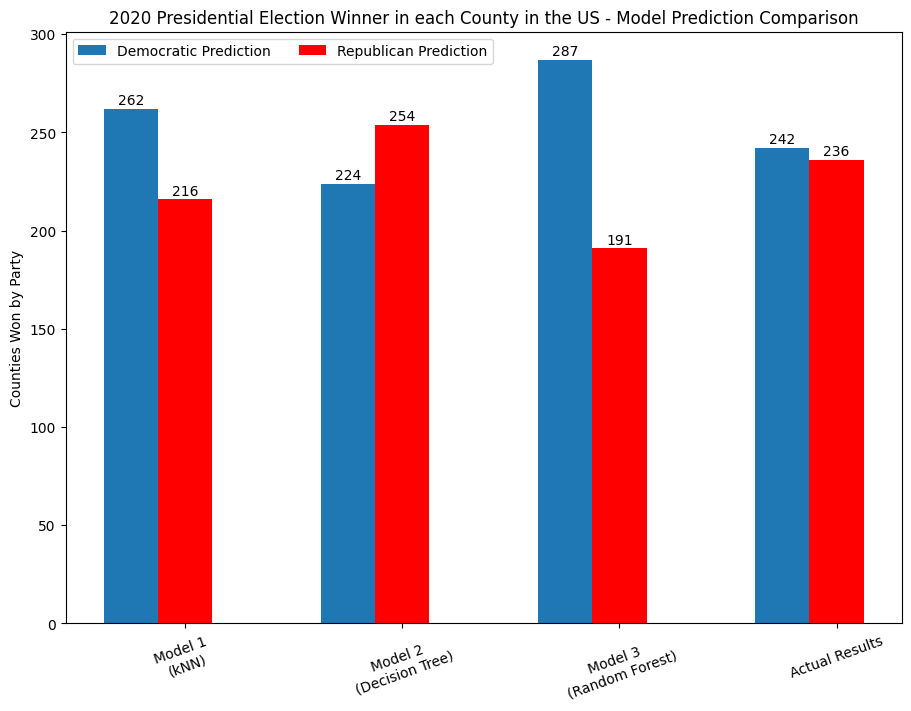

In [405]:
# Plotting grouped bar charts using subplots (matplotlib)

models = ('Model 1 \n(kNN)', 'Model 2 \n(Decision Tree)', 'Model 3 \n(Random Forest)', 'Actual Results')

count = {
    'Democratic Prediction': (dem_count1, dem_count2, dem_count3, 242),
    'Republican Prediction': (rep_count1, rep_count2, rep_count3, 236)
}

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(9, 7))

for attribute, measurement in count.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.set_prop_cycle(color=['red'])
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counties Won by Party')
ax.set_title('2020 Presidential Election Winner in each County in the US - Model Prediction Comparison')
ax.set_xticks(x + width, models, rotation=20)
ax.legend(loc='upper left', ncols=2)
# ax.set_ylim(0, 250)
plt.show()

#### From this we observe that Model 1 (kNN) was closest to predicting the number of counties won by both parties, while Model 3 (Random Forest) overestimated the margin of the Democratic victory. Model 2 (Decision Tree) in fact erronously predicted a Republican win. 

#### We conclude that the **k-Nearest Neighbours** based model had a satifactory performance while training and evaluating on election data from previous elections (2008, 2012 and 2016), and also predicted the 2020 results with sufficient accuracy. 

### *Thus we complete our analysis and prediction of the 2020 American Presidential Election.*